## Run a RF model for each variable and obtain the importances and interactions between the variables. 

## Code RF

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from openpyxl import Workbook
import os

In [26]:
# Cargar los datos desde los archivos CSV exportados
indep_variables_no_ceros = pd.read_csv('../DataIntermediate/combined_data_indep_variables_indeg_outdeg.csv', sep=',')
dep_variables_no_ceros = pd.read_csv('../DataIntermediate/combined_data_dep_variables_indeg_outdeg.csv', sep=',')

# Vista previa de los datos cargados
dep_variables_no_ceros.head()

,id,Degree_Rede_EntreajudaLabur,OutDeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_RedeControlExtAusencia,OutDeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecDiqCint,OutDeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_ApoioSpecTubos,OutDeg_Var.Dep_RedApoiLevntDiCin,Indeg_Var.Dep_RedApoiLevntDiCin,...,OutDeg_RedeRepar_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,OutDeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqCin,OutDeg_Red-Val_Cont1Rep2DiqPrq,Indeg_Red-Val_Cont1Rep2DiqPrq,OutDeg_ContRep2_DiqPrqCin,Indeg_ContRep2_DiqPrqCin,OutDeg_Var.Dep_RedePartilhaAgu,Indeg_Var.Dep_RedePartilhaAgu
0,Antonio Mbunh,12,3,1,4,2,0,2,1,0,...,6,2,11,0,11,4,14,4,0,0
1,Bulna Ntumba,12,1,3,0,1,0,1,1,0,...,1,3,2,6,3,7,3,7,2,0
2,Nghala Pungana,12,1,1,1,1,0,1,1,2,...,1,1,3,2,3,4,4,4,0,0
3,Samba Ndum,12,3,1,2,1,1,2,2,4,...,4,9,6,18,7,18,9,18,1,0
4,Tomas Isnaba,12,3,2,8,2,1,3,3,3,...,6,4,12,5,10,8,15,8,0,1


In [5]:

from sklearn.preprocessing import LabelEncoder
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Aplicar LabelEncoder a cada columna en la lista
for col in columns_to_encode:
    indep_variables_no_ceros[col] = label_encoder.fit_transform(indep_variables_no_ceros[col])



### Acá es dónde vas a filtrar las variables independientes

Si vas a eliminar variables para modelar es aquí donde debes hacerlo

In [8]:
variables = [
    'id',
    'Indeg_RedConfltAgu',
    'Degree_IntimAmigUnd',
    'Indeg_IntimAmigos_',
    'Indeg_RedeRisk_Cen',
    'Indeg_RedeConfianc',
    'Degree_RedeConflitA',
    'Degree_RedeConflitG',
    'Indeg_VendaParcela',
    'Indeg_EmprestParce',
    'PC1_Distance_Pro',
    'Avg_Distancia_Dist_moranza',
    'Degree_RedeTotFamil',
    '1_VarExp_Moranca',
    '2_VarExp_Atri_Tabanca',
    '3_VarExp_Atri_Fanado',
    '4_VarExp_Atri_CargosWM',
    '5_VarExp_Atri_Idade',
    '7_VarExp_Atri_IndForcaFugon',
    '8_VarExp_Atri_IndInvestDiq',
    '9_VarExp_Atri_IndMelhorTecnDiqCint',
    '10_VarExp_Atri_MelhorTecnTubos', 
    'Area_bolanha',
    'OutDeg_RedConfltAgu', # OUTDEG variables
    'OutDeg_PaiTiopaterC',
    'OutDeg_TiosMaternos',
    'OutDeg_IntimAmigos_',
    'OutDeg_RedeRisk_Cen',
    'OutDeg_RedeConfianc',
    'OutDeg_VendaParcela',
    'OutDeg_EmprestParce']

#RAW
# variables = [
#     'id',
#     'Indeg_RedConfltAgu',
#     'Degree_IntimAmigUnd',
#     'Indeg_IntimAmigos_',
#     'Indeg_RedeRisk_Cen',
#     'Indeg_RedeConfianc',
#     'Degree_RedeConflitA',
#     'Degree_RedeConflitG',
#     'Indeg_VendaParcela',
#     'Indeg_EmprestParce',
#     'PC1_Distance_Pro',
#     'Avg_Distancia_Dist_moranza',
#     'Degree_RedeTotFamil',
#     '1_VarExp_Moranca',
#     '2_VarExp_Atri_Tabanca',
#     '3_VarExp_Atri_Fanado',
#     '4_VarExp_Atri_CargosWM',
#     '5_VarExp_Atri_Idade',
#     '7_VarExp_Atri_IndForcaFugon',
#     '8_VarExp_Atri_IndInvestDiq',
#     '9_VarExp_Atri_IndMelhorTecnDiqCint',
#     '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

#PRESELECT OUTDEG
#variables = ['id',    'OutDeg_RedConfltAgu',
    # 'Degree_IntimAmigUnd',
    # 'OutDeg_IntimAmigos_',
    # 'OutDeg_RedeRisk_Cen',
    # 'OutDeg_RedeConfianc',
    # 'Degree_RedeConflitA',
    # 'Degree_RedeConflitG',
    # 'OutDeg_VendaParcela',
    # 'OutDeg_EmprestParce',
    # 'PC1_Distance_Pro',
    # 'Avg_Distancia_Dist_moranza',
    # 'Degree_RedeTotFamil',
    # '1_VarExp_Moranca',
    # '2_VarExp_Atri_Tabanca',
    # '3_VarExp_Atri_Fanado',
    # '4_VarExp_Atri_CargosWM',
    # '5_VarExp_Atri_Idade',
    # '7_VarExp_Atri_IndForcaFugon',
    # '8_VarExp_Atri_IndInvestDiq',
    # '9_VarExp_Atri_IndMelhorTecnDiqCint',
    # '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

#RAW
#variables = ['id',    'OutDeg_RedConfltAgu',
    # 'Degree_RedConfliAgu',
    # 'Degree_RedeIrmonsPr',
    # 'OutDeg_PaiTiopaterC',
    # 'OutDeg_TiosMaternos',
    # 'Degree_IntimAmigUnd',
    # 'OutDeg_IntimAmigos_',
    # 'OutDeg_RedeRisk_Cen',
    # 'OutDeg_RedeConfianc',
    # 'Degree_RedeConflitA',
    # 'Degree_RedeConflitG',
    # 'OutDeg_VendaParcela',
    # 'OutDeg_EmprestParce',
    # 'PC1_Distance_Pro',
    # 'PC2_Distance_Pro',
    # 'Avg_Distancia_Dist_moranza',
    # 'Degree_RedeTotFamil',
    # '1_VarExp_Moranca',
    # '2_VarExp_Atri_Tabanca',
    # '3_VarExp_Atri_Fanado',
    # '4_VarExp_Atri_CargosWM',
    # '5_VarExp_Atri_Idade',
    # '6_VarExp_Atri_ClassIdade',
    # '7_VarExp_Atri_IndForcaFugon',
    # '8_VarExp_Atri_IndInvestDiq',
    # '9_VarExp_Atri_IndMelhorTecnDiqCint',
    # '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

#RAW
# variables = [
#     'id',
#     'Indeg_RedConfltAgu',
#     'Degree_RedConfliAgu',
#     'Degree_RedeIrmonsPr',
#     'Indeg_PaiTiopaterC',
#     'Indeg_TiosMaternos',
#     'Degree_IntimAmigUnd',
#     'Indeg_IntimAmigos_',
#     'Indeg_RedeRisk_Cen',
#     'Indeg_RedeConfianc',
#     'Degree_RedeConflitA',
#     'Degree_RedeConflitG',
#     'Indeg_VendaParcela',
#     'Indeg_EmprestParce',
#     'PC1_Distance_Pro',
#     'PC2_Distance_Pro',
#     'Avg_Distancia_Dist_moranza',
#     'Degree_RedeTotFamil',
#     '1_VarExp_Moranca',
#     '2_VarExp_Atri_Tabanca',
#     '3_VarExp_Atri_Fanado',
#     '4_VarExp_Atri_CargosWM',
#     '5_VarExp_Atri_Idade',
#     '6_VarExp_Atri_ClassIdade',
#     '7_VarExp_Atri_IndForcaFugon',
#     '8_VarExp_Atri_IndInvestDiq',
#     '9_VarExp_Atri_IndMelhorTecnDiqCint',
#     '10_VarExp_Atri_MelhorTecnTubos', 'Area_bolanha']

In [9]:
indep_variables_no_ceros = indep_variables_no_ceros[variables]

indep_variables_no_ceros.head()

,id,Indeg_RedConfltAgu,Degree_IntimAmigUnd,Indeg_IntimAmigos_,Indeg_RedeRisk_Cen,Indeg_RedeConfianc,Degree_RedeConflitA,Degree_RedeConflitG,Indeg_VendaParcela,Indeg_EmprestParce,...,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha,OutDeg_RedConfltAgu,OutDeg_PaiTiopaterC,OutDeg_TiosMaternos,OutDeg_IntimAmigos_,OutDeg_RedeRisk_Cen,OutDeg_RedeConfianc,OutDeg_VendaParcela,OutDeg_EmprestParce
0,Antonio Mbunh,1,5,5,0,3,0,0,0,0,...,0,1.9217,1,0,0,2,2,1,0,4
1,Bulna Ntumba,0,1,0,1,0,0,1,0,1,...,0,1.8387,0,4,0,1,4,1,1,0
2,Nghala Pungana,0,3,2,2,1,0,0,1,0,...,0,1.6564,0,0,0,2,2,1,0,0
3,Samba Ndum,0,9,1,0,4,0,0,0,0,...,0,2.6717,0,0,0,8,5,4,0,1
4,Tomas Isnaba,0,8,5,2,6,0,0,1,0,...,2,2.2281,0,0,0,3,6,3,0,0


Variables dependientes: 

1. Considerando que lo mejor es analizar una a una para ver importancias e interacciones en el modelo de RF, debe copiar una de la variables de la lista y ponerla (dentro de las comillas simples) en la siguiente celda en la variable: *'variable_a_predecir = dep_variables_no_ceros['']'*

2. Lista: 
- Degree_Rede_EntreajudaLabur 

- Indeg_Var.Dep_RedeControlExtAusencia	
- Indeg_Var.Dep_ApoioSpecDiqCint	
- Indeg_Var.Dep_ApoioSpecTubos	
- Indeg_Var.Dep_RedApoiLevntDiCin	
- Indeg_RedCont_DiqPriqDiqCint	
- Indeg_RedeRepar_DiqPriqDiqCint	
- Indeg_Red-Val_Cont1Rep2DiqCin	
- Indeg_Red-Val_Cont1Rep2DiqPrq	
- Indeg_ContRep2_DiqPrqCin 
- Indeg_Var.Dep_RedePartilhaAgu

- OutDeg_Var.Dep_RedeControlExtAusencia	
- OutDeg_Var.Dep_ApoioSpecDiqCint	
- OutDeg_Var.Dep_ApoioSpecTubos	
- OutDeg_Var.Dep_RedApoiLevntDiCin	
- OutDeg_RedCont_DiqPriqDiqCint	
- OutDeg_RedeRepar_DiqPriqDiqCint	
- OutDeg_Red-Val_Cont1Rep2DiqCin	
- OutDeg_Red-Val_Cont1Rep2DiqPrq	
- OutDeg_ContRep2_DiqPrqCin 
- OutDeg_Var.Dep_RedePartilhaAgu

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


variable_a_predecir = dep_variables_no_ceros['OutDeg_Var.Dep_RedeControlExtAusencia']

# Definir la variable dependiente y las variables independientes
X = indep_variables_no_ceros.drop(columns=['id'])
y = variable_a_predecir

y.head()

0    3
1    1
2    1
3    3
4    3
Name: OutDeg_Var.Dep_RedeControlExtAusencia, dtype: int64

In [11]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables independientes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=110, random_state=42)
rf.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)

# Redondear las predicciones a enteros
y_pred_train = np.round(y_pred_train).astype(int)
y_pred_test = np.round(y_pred_test).astype(int)


Mean Squared Error: 1.7692
R^2 Score: 0.2053


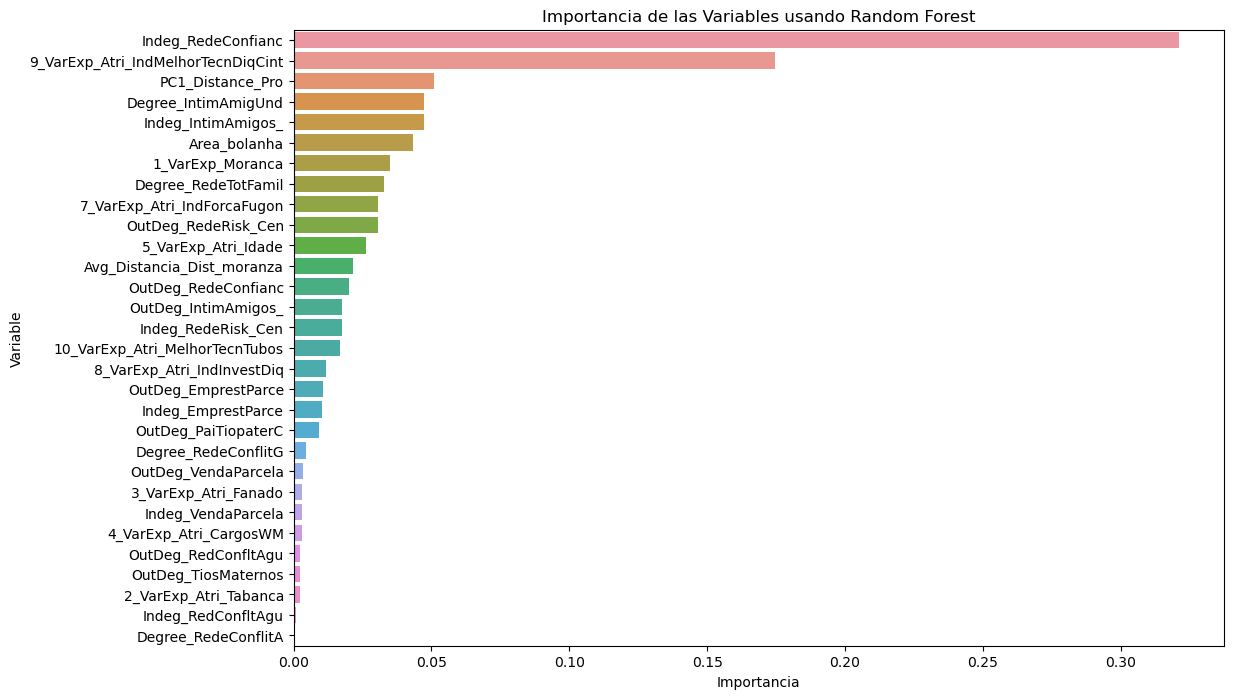

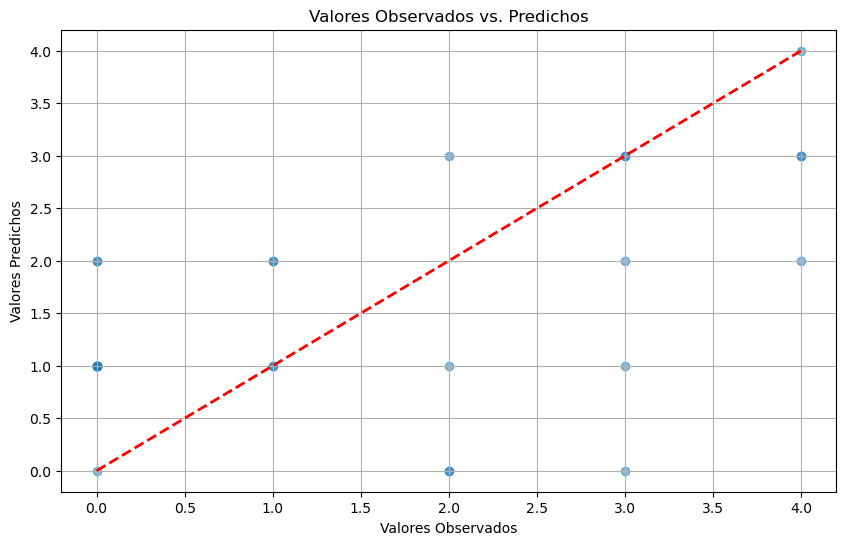

In [12]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred_test)

# Calcular R^2 manualmente (este valor hermano debería ser el correcto)
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) * (y_test - y_mean))
ss_residual = np.sum((y_test - y_pred_test) * (y_test - y_pred_test))
r2 = 1 - (ss_residual / ss_total)

n = len(y_test)
p = X_test_scaled.shape[1]

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Calcular la importancia de las variables
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Crear un gráfico de las importancias de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=importance_df)
plt.title('Importancia de las Variables usando Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

# Crear un gráfico de Valores Observados vs. Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Observados vs. Predichos')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()


In [17]:
# Guardar los valores observados y predichos en un archivo Excel
resultados_df = pd.DataFrame({
    'Valores Observados': y_test,
    'Valores Predichos': y_pred_test
})

# Ruta del archivo Excel
ruta_archivo = '../Pruebas/resultados_observados_vs_predichos_all_indeg_outdeg.xlsx'
resultados_df.to_excel(ruta_archivo, index=False)
print(f"Valores observados y predichos guardados en {ruta_archivo}")

Valores observados y predichos guardados en ../Pruebas/resultados_observados_vs_predichos_all_indeg_outdeg.xlsx


In [18]:
# Definir la ruta de salida
output_path_importances = "../Pruebas/importances_all_indeg_outdeg.csv"
os.makedirs("../Pruebas/", exist_ok=True)

# Guardar las 10 interacciones más altas en un archivo CSV

importance_df.to_csv(output_path_importances, index=True)

In [19]:
from sklearn.inspection import partial_dependence

variables = X.columns

# Calcular la importancia y la dirección de las interacciones
interaction_importances = []

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        pdp = partial_dependence(rf, X_train_scaled, features=[i, j], kind="average")
        pdp_values = pdp['average'][0]
        
        # Calcular la importancia de la interacción
        interaction_importance = np.mean(np.abs(pdp_values - pdp_values.mean()))
        
        # Calcular la dirección de la interacción
        direction = np.mean(np.diff(pdp_values, axis=0))
        
        interaction_importances.append(((variables[i], variables[j]), interaction_importance, direction))

# Ordenar interacciones por importancia
interaction_importances = sorted(interaction_importances, key=lambda x: x[1], reverse=True)
interaction_importance_df = pd.DataFrame(interaction_importances, columns=['Interacción', 'Importancia', 'Dirección'])



In [20]:
# Mostrar las 10 interacciones más importantes
interaction_importance_df.head(10)

,Interacción,Importancia,Dirección
0,"(Indeg_RedeConfianc, 9_VarExp_Atri_IndMelhorTe...",0.567699,0.202552
1,"(Degree_IntimAmigUnd, Indeg_RedeConfianc)",0.464994,0.041676
2,"(Indeg_IntimAmigos_, Indeg_RedeConfianc)",0.455770,0.032374
3,"(Indeg_RedeConfianc, 10_VarExp_Atri_MelhorTecn...",0.449506,0.208422
4,"(Indeg_RedeConfianc, PC1_Distance_Pro)",0.449487,0.207006
5,"(Indeg_RedeConfianc, Avg_Distancia_Dist_moranza)",0.446172,0.205371
6,"(Indeg_RedeConfianc, 7_VarExp_Atri_IndForcaFugon)",0.445985,0.200911
7,"(Indeg_RedeConfianc, Degree_RedeConflitG)",0.445061,0.202179
8,"(Indeg_RedeConfianc, OutDeg_TiosMaternos)",0.444998,0.204987
9,"(Indeg_RedeConfianc, Indeg_VendaParcela)",0.444509,0.203535


In [22]:
# Ordenar el DataFrame por la columna de importancia en orden descendente
interaction_importance_df_sorted = interaction_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 interacciones más altas
top_10_interactions = interaction_importance_df_sorted.head(10)

# Definir la ruta de salida
output_path = "../Pruebas/interactions_modeled_all_indeg_outdeg.csv"
os.makedirs("../Pruebas/", exist_ok=True)

# Guardar las 10 interacciones más altas en un archivo CSV
try:
    top_10_interactions.to_csv(output_path, index=True)
    print(f"Archivo guardado exitosamente en {output_path}.")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")

Archivo guardado exitosamente en ../Pruebas/interactions_modeled_all_indeg_outdeg.csv.


In [23]:
# Combinar predicciones de entrenamiento y prueba para todo el conjunto de datos
y_pred_all = np.concatenate([y_pred_train, y_pred_test])
y_all = np.concatenate([y_train, y_test])

In [24]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_all, y_pred_all)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_all, y_pred_all)
r2 = r2_score(y_all, y_pred_all)
pearson_corr, _ = pearsonr(y_all, y_pred_all)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Pearson Correlation: {pearson_corr:.4f}")


Mean Squared Error (MSE): 0.5504
Root Mean Squared Error (RMSE): 0.7419
Mean Absolute Error (MAE): 0.3953
R^2 Score: 0.7587
Pearson Correlation: 0.8721


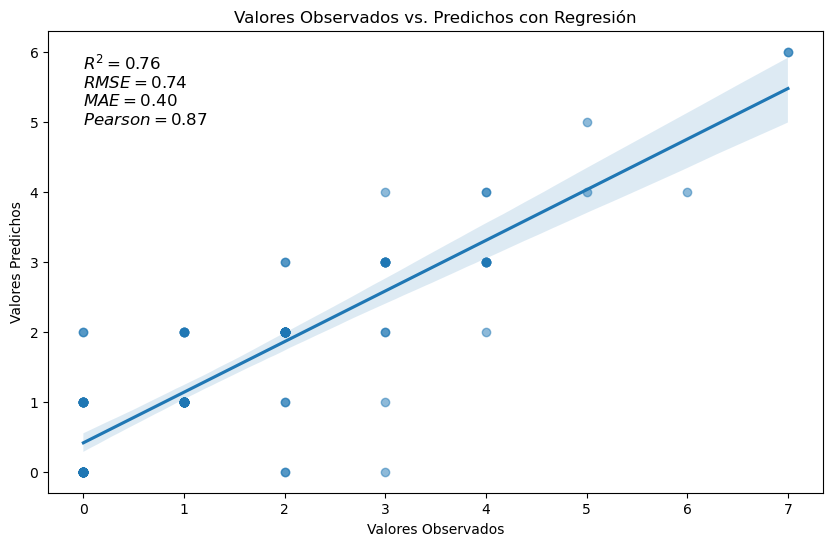

In [25]:
# Crear un gráfico de Valores Observados vs. Predichos con regresión
plt.figure(figsize=(10, 6))
sns.regplot(x=y_all, y=y_pred_all, scatter_kws={'alpha':0.5})
# plt.plot([min(y_all), max(y_all)], [min(y_all), max(y_all)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Observados vs. Predichos con Regresión')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.text(min(y_all), max(y_pred_all), f'$R^2 = {r2:.2f}$\n$RMSE = {rmse:.2f}$\n$MAE = {mae:.2f}$\n$Pearson = {pearson_corr:.2f}$', fontsize=12, verticalalignment='top')
plt.grid(False)
plt.show()




## Correlación de dependientes indeg vs independientes con outdeg e indeg

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Leer los DataFrames
data_combinada_dep_indeg_out_deg = pd.read_csv('../DataIntermediate/combined_data_dep_variables_indeg_outdeg.csv', sep=',')
data_combinada_indep_indeg_out_deg  = pd.read_csv('../DataIntermediate/combined_data_indep_variables_indeg_outdeg.csv', sep=',')


In [68]:
# Eliminar la columna 'id' de ambos DataFrames
data_combinada_dep_indeg_out_deg = data_combinada_dep_indeg_out_deg.drop(columns=['id'], errors='ignore')
data_combinada_indep_indeg_out_deg = data_combinada_indep_indeg_out_deg.drop(columns=['id'], errors='ignore')

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

In [69]:
# Aplicar LabelEncoder a cada columna en la lista en el DataFrame de variables independientes
for col in columns_to_encode:
    if col in data_combinada_indep_indeg_out_deg.columns:
        data_combinada_indep_indeg_out_deg[col] = label_encoder.fit_transform(data_combinada_indep_indeg_out_deg[col])

# Separar las variables dependientes en indeg y outdeg
dep_indeg = data_combinada_dep_indeg_out_deg.filter(regex='^(Indeg|Deg)')
dep_outdeg = data_combinada_dep_indeg_out_deg.filter(regex='^(OutDeg|Deg)')

# Unir las variables independientes y dependientes en dos DataFrames separados
data_combined_indeg = pd.concat([data_combinada_indep_indeg_out_deg, dep_indeg], axis=1)
data_combined_outdeg = pd.concat([data_combinada_indep_indeg_out_deg, dep_outdeg], axis=1)

# Calcular la matriz de correlación para indeg y outdeg
correlation_matrix_indeg = data_combined_indeg.corr()
correlation_matrix_outdeg = data_combined_outdeg.corr()

# Guardar las matrices de correlación completas en archivos CSV
correlation_matrix_indeg.to_csv('../Pruebas/correlation_matrix_indeg.csv')
correlation_matrix_outdeg.to_csv('../Pruebas/correlation_matrix_outdeg.csv')

# Filtrar las correlaciones significativas (mayores a 0.1 en valor absoluto) para indeg
threshold = 0.1
indeg_vars = dep_indeg.columns
indeg_indep_corr = correlation_matrix_indeg.loc[indeg_vars, data_combinada_indep_indeg_out_deg.columns]


c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


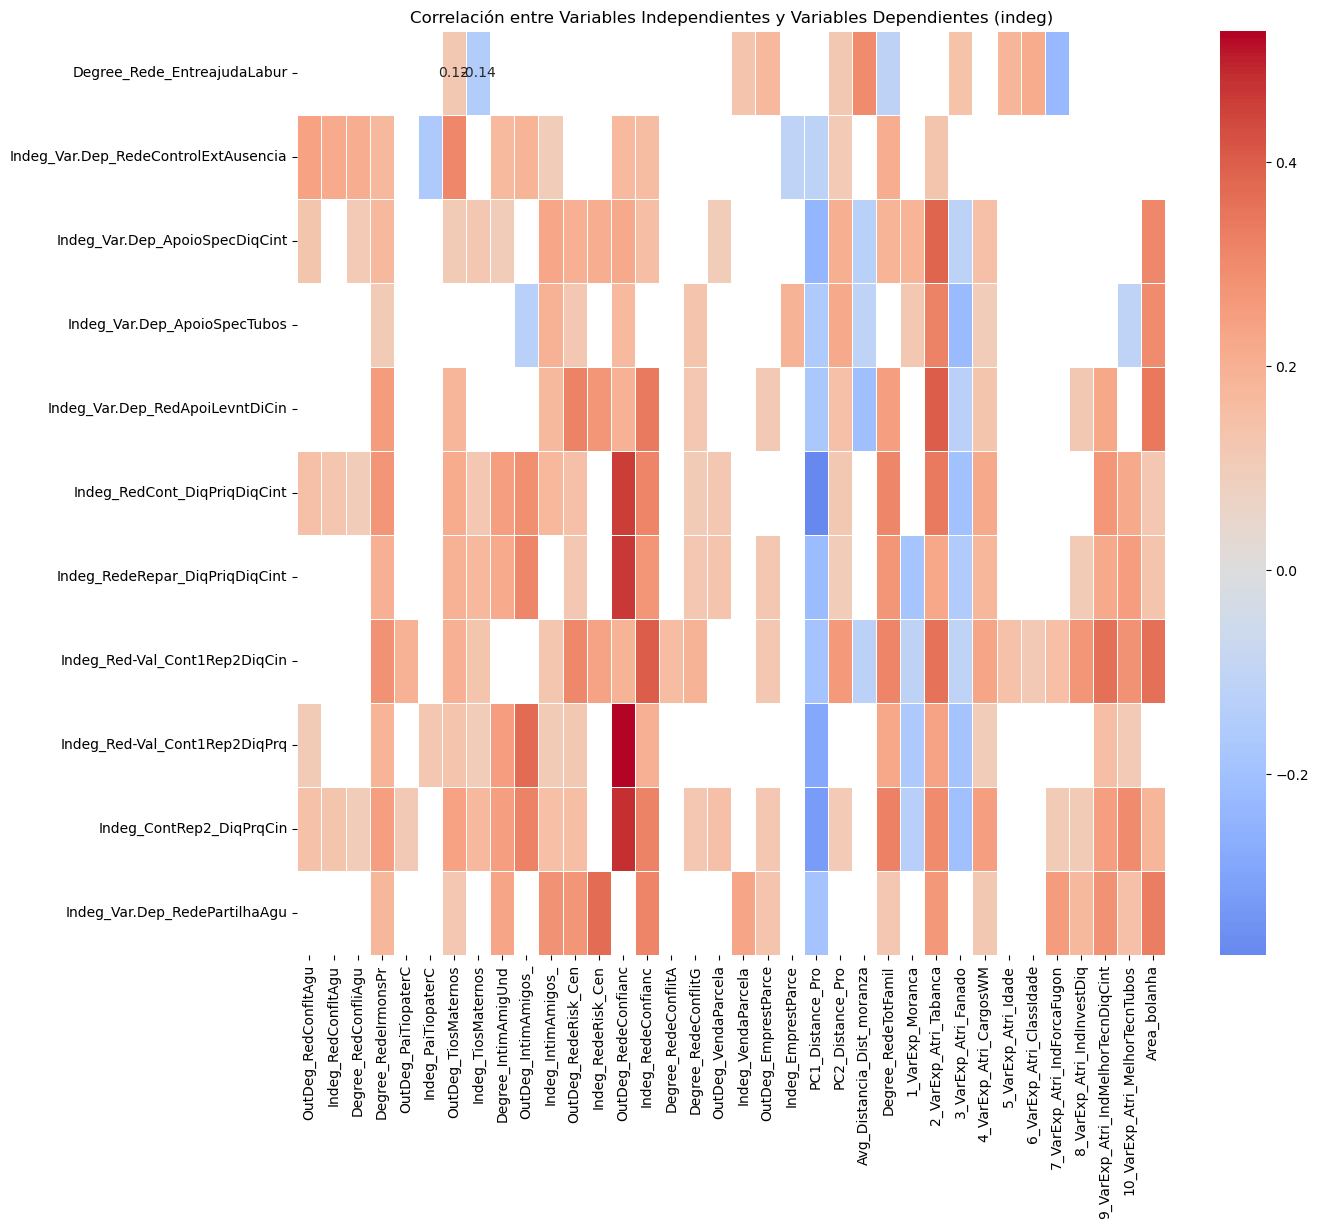

In [70]:

# Filtrar correlaciones superiores al umbral para indeg
indeg_corr_filtered = indeg_indep_corr[abs(indeg_indep_corr) > threshold]

# Crear un corplot (mapa de calor) de las correlaciones filtradas para indeg
plt.figure(figsize=(14, 12))
sns.heatmap(indeg_corr_filtered, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)
plt.title('Correlación entre Variables Independientes y Variables Dependientes (indeg)')
plt.show()

c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


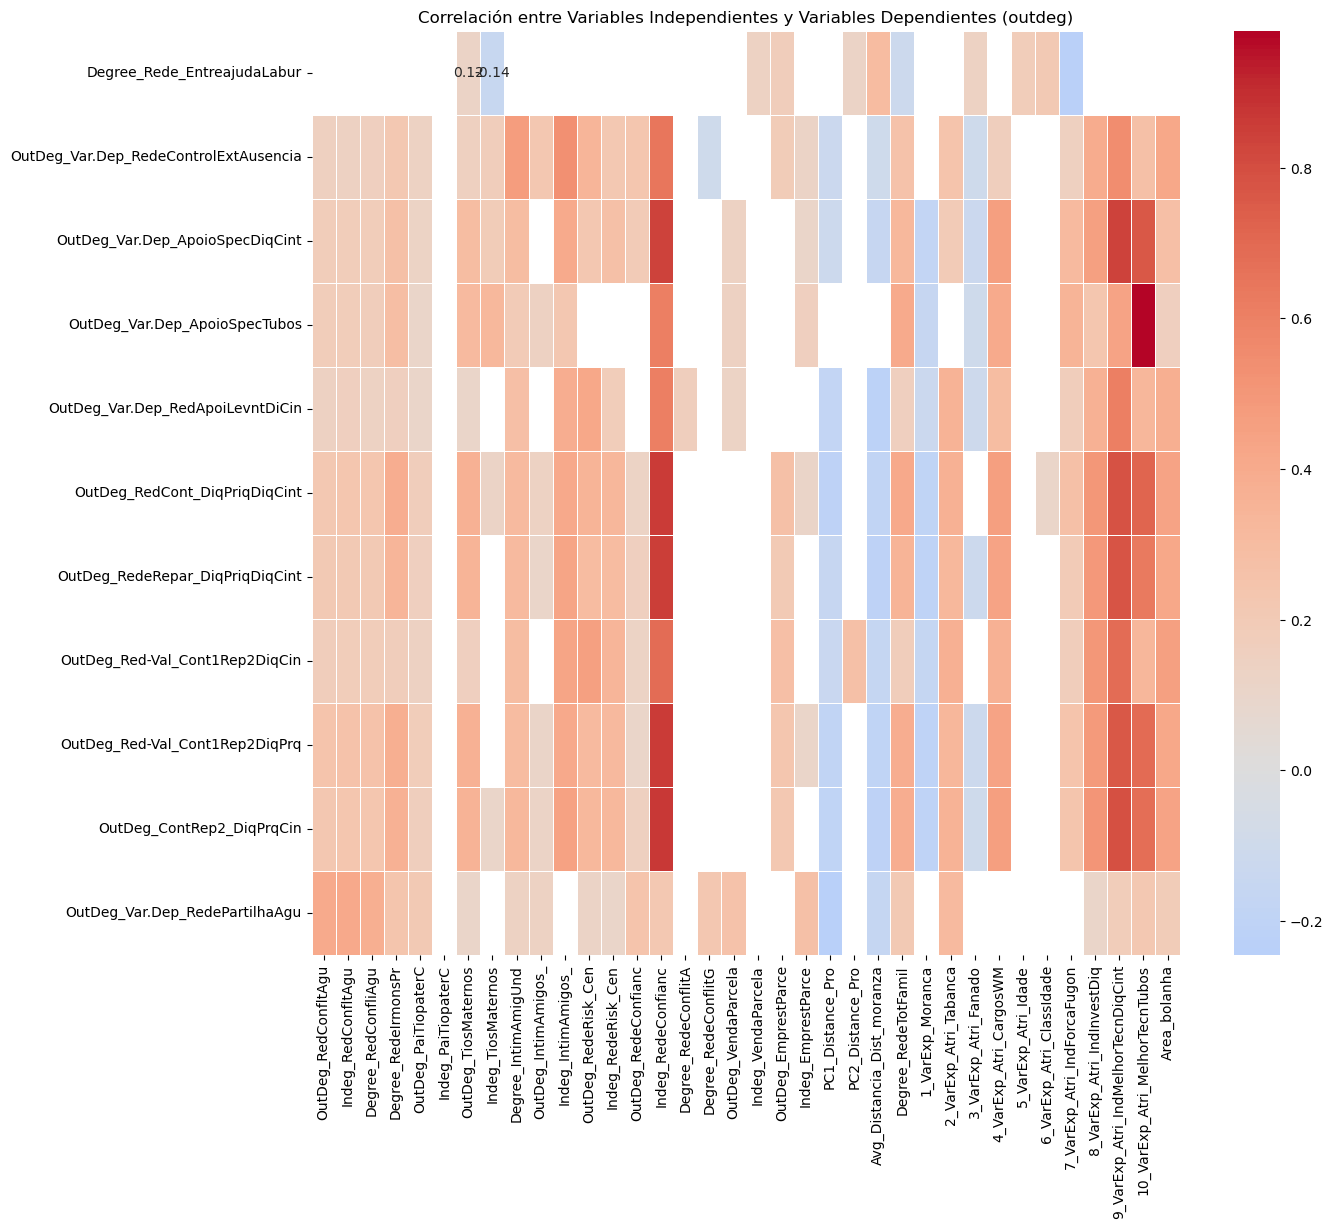

In [71]:
# Filtrar las correlaciones significativas (mayores a 0.1 en valor absoluto) para outdeg
outdeg_vars = dep_outdeg.columns
outdeg_indep_corr = correlation_matrix_outdeg.loc[outdeg_vars, data_combinada_indep_indeg_out_deg.columns]

# Filtrar correlaciones superiores al umbral para outdeg
outdeg_corr_filtered = outdeg_indep_corr[abs(outdeg_indep_corr) > threshold]
# Crear un corplot (mapa de calor) de las correlaciones filtradas para outdeg
plt.figure(figsize=(14, 12))
sns.heatmap(outdeg_corr_filtered, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)
plt.title('Correlación entre Variables Independientes y Variables Dependientes (outdeg)')
plt.show()